In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
from scipy.stats import entropy
from sklearn.linear_model import LogisticRegression
from polyagamma import random_polyagamma
from utils.generate import GenerateData_binomial
from utils.metrics import KLD
from models.proposed_method import proposed_method_binomial
from models.compared_methods import compared_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

# バイアスアルゴリズム：ステップ

In [10]:
Ex_num = 100 # パラメータを生成する回数

# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [1]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,4]
beta_sigma = [0.5,0.5]

threshfold = 2

sample_size_list = np.linspace(100,1000,10).astype(int)

KL_list = [] # 結果格納用 (threshfoldの数, 3)→ 標本平均, 比較手法，提案手法

for sample_size in sample_size_list:

    KL_list_proposed_by_condition = []
    KL_list_sample_mean_by_condition = []
    KL_list_ML_by_condition = []

    trial = 0
    with tqdm() as pbar:
        while trial < Ex_num: # パラメータによるモンテカルロ平均（ベイズ最適な推定量）
            # クラスをインスタンス化
            generator = GenerateData_binomial(
                n_features=n_features,
                X_mu_list=X_mu,
                X_sigma_list=X_sigma,
                beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
                beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
            )

            # データを生成
            X, y = generator.generate_non_bias_data()
            X_bias, y_bias = generator.generate_bias_data(n_samples=sample_size, X_features_bias= 1 , threshfold= threshfold,sample_type="threshfold_step")

            if (y_bias.mean() != 1) & (y_bias.mean() != 0): # 0と1両方あるサンプルが生成できた場合のみ計算を実行する

                b_0 = np.array([0.001, 0.001])
                B_0 = np.array([np.diag([100, 100])]) # B_0の形状を変更

                burn = 2000
                draw = 5000

                # proposed_method_binomialのインスタンスを作成
                method = proposed_method_binomial(X_bias, y_bias, b_0, B_0, X_mu, X_sigma, burn, draw) # proposed_methodをproposed_method_binomialに変更
                compared_method = compared_methods(X_bias, y_bias, X_mu, X_sigma)

                # sample_betaメソッドを実行
                beta_posterior = method.sample_beta()

                P_true = y.mean()
                P_sample_mean = y_bias.mean()
                P_ML = compared_method.maximum_likelihood(draw=draw)
                P_proposed = method.estimate()

                KL_list_sample_mean_by_condition.append(KLD(P_true, P_sample_mean))
                KL_list_ML_by_condition.append(KLD(P_true, P_ML))
                KL_list_proposed_by_condition.append(KLD(P_true, P_proposed))

                pbar.update(1)
                trial += 1
            else:
                print("バイアスサンプルの生成に失敗しました")

    # 提案手法と比較手法の結果を表示
    print(f"実験条件:{threshfold=}")
    print("サンプル平均P:", np.mean(KL_list_sample_mean_by_condition))
    print("最尤推定P:", np.mean(KL_list_ML_by_condition))
    print("提案手法P:", np.mean(KL_list_proposed_by_condition))

    KL_list.append([np.mean(KL_list_sample_mean_by_condition), np.mean(KL_list_ML_by_condition), np.mean(KL_list_proposed_by_condition)])
KL_list

100it [01:23,  1.20it/s]


実験条件:threshfold=2
サンプル平均P: 0.12504494237747257
最尤推定P: 0.0029707256307093177
提案手法P: 0.0018090458557990796


100it [02:37,  1.58s/it]


実験条件:threshfold=2
サンプル平均P: 0.11829229706469645
最尤推定P: 0.00257422572853674
提案手法P: 0.0010050376208862633


100it [03:41,  2.21s/it]


実験条件:threshfold=2
サンプル平均P: 0.1158319184189112
最尤推定P: 0.002371198921533817
提案手法P: 0.0006054941123216296


100it [07:30,  4.51s/it]


実験条件:threshfold=2
サンプル平均P: 0.11656488489398249
最尤推定P: 0.0023143859464030926
提案手法P: 0.0004282899662458195


100it [11:26,  6.87s/it]


実験条件:threshfold=2
サンプル平均P: 0.11517425888238624
最尤推定P: 0.0022865745540590556
提案手法P: 0.0005219329172309528


100it [16:47, 10.07s/it]


実験条件:threshfold=2
サンプル平均P: 0.11436125008997801
最尤推定P: 0.0024507005867620713
提案手法P: 0.0003282251897636301


100it [22:22, 13.42s/it]


実験条件:threshfold=2
サンプル平均P: 0.11719544540256026
最尤推定P: 0.002541358715949539
提案手法P: 0.0002909268506534923


100it [28:09, 16.90s/it]


実験条件:threshfold=2
サンプル平均P: 0.11397402896061574
最尤推定P: 0.0024185326088020363
提案手法P: 0.00023415414562099278


100it [34:53, 20.94s/it]


実験条件:threshfold=2
サンプル平均P: 0.11723477640855334
最尤推定P: 0.002258707611127584
提案手法P: 0.00025822834437197017


100it [45:36, 27.36s/it]

実験条件:threshfold=2
サンプル平均P: 0.11693449418257484
最尤推定P: 0.0024008858885123806
提案手法P: 0.0002542331837685818


[[np.float64(0.12504494237747257),
  np.float64(0.0029707256307093177),
  np.float64(0.0018090458557990796)],
 [np.float64(0.11829229706469645),
  np.float64(0.00257422572853674),
  np.float64(0.0010050376208862633)],
 [np.float64(0.1158319184189112),
  np.float64(0.002371198921533817),
  np.float64(0.0006054941123216296)],
 [np.float64(0.11656488489398249),
  np.float64(0.0023143859464030926),
  np.float64(0.0004282899662458195)],
 [np.float64(0.11517425888238624),
  np.float64(0.0022865745540590556),
  np.float64(0.0005219329172309528)],
 [np.float64(0.11436125008997801),
  np.float64(0.0024507005867620713),
  np.float64(0.0003282251897636301)],
 [np.float64(0.11719544540256026),
  np.float64(0.002541358715949539),
  np.float64(0.0002909268506534923)],
 [np.float64(0.11397402896061574),
  np.float64(0.0024185326088020363),
  np.float64(0.00023415414562099278)],
 [np.float64(0.11723477640855334),
  np.float64(0.002258707611127584),
  np.float64(0.00025822834437197017)],
 [np.float64(0

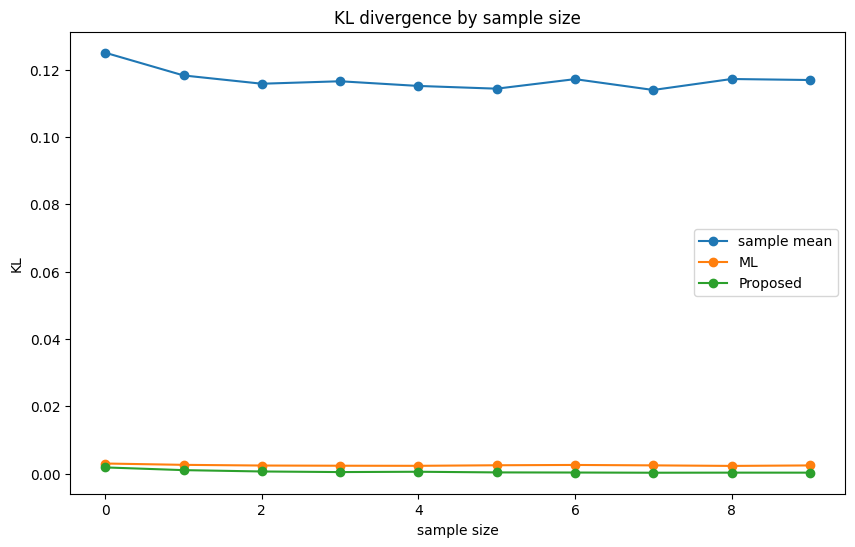

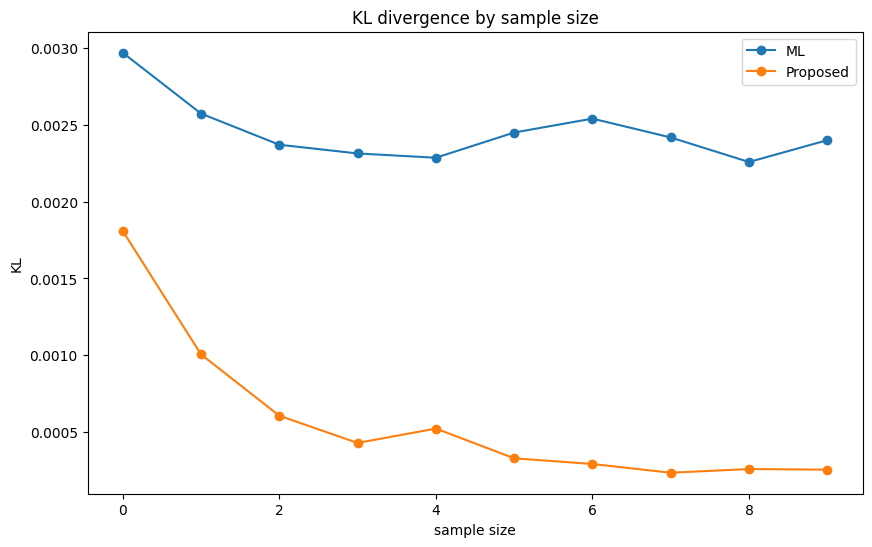

In [11]:
KL_list = np.array(KL_list).T
label = ["sample mean", "MLE", "Proposed"]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(KL_list[i], marker='o', linestyle='-', label=label[i]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size")
plt.ylabel("KL")
plt.legend()
plt.title("KL divergence by sample size")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(KL_list[i+1], marker='o', linestyle='-', label=label[i+1]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size")
plt.ylabel("KL")
plt.legend()
plt.title("KL divergence by sample size")
plt.show()


# $P_{prop}(Z|X)$

In [3]:
Ex_num = 10 # パラメータを生成する回数

# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [0]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,4]
beta_sigma = [0.5,0.5]

threshfold = 2

sample_size_list = np.linspace(100,1000,10).astype(int)

KL_list = [] # 結果格納用 (threshfoldの数, 3)→ 標本平均, 比較手法，提案手法

for sample_size in sample_size_list:

    KL_list_proposed_by_condition = []
    KL_list_sample_mean_by_condition = []
    KL_list_ML_by_condition = []

    trial = 0
    with tqdm() as pbar:
        while trial < Ex_num: # パラメータによるモンテカルロ平均（ベイズ最適な推定量）
            # クラスをインスタンス化
            generator = GenerateData_binomial(
                n_features=n_features,
                X_mu_list=X_mu,
                X_sigma_list=X_sigma,
                beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
                beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
            )

            # データを生成
            X, y = generator.generate_non_bias_data()
            X_bias, y_bias, _ = generator.generate_bias_data(n_samples=sample_size, X_features_bias= 1 , threshfold= threshfold,sample_type="prop")

            if (y_bias.mean() != 1) & (y_bias.mean() != 0): # 0と1両方あるサンプルが生成できた場合のみ計算を実行する

                b_0 = np.array([0.001, 0.001])
                B_0 = np.array([np.diag([10, 10])]) # B_0の形状を変更

                burn = 5000
                draw = 10000

                # proposed_method_binomialのインスタンスを作成
                method = proposed_method_binomial(X_bias, y_bias, b_0, B_0, X_mu, X_sigma, burn, draw) # proposed_methodをproposed_method_binomialに変更
                compared_method = compared_methods(X_bias, y_bias, X_mu, X_sigma)

                # sample_betaメソッドを実行
                beta_posterior = method.sample_beta()

                P_true = y.mean()
                P_sample_mean = y_bias.mean()
                P_ML = compared_method.maximum_likelihood(draw=draw)
                P_proposed = method.estimate()

                KL_list_sample_mean_by_condition.append(KLD(P_true, P_sample_mean))
                KL_list_ML_by_condition.append(KLD(P_true, P_ML))
                KL_list_proposed_by_condition.append(KLD(P_true, P_proposed))

                pbar.update(1)
                trial += 1
            else:
                print("バイアスサンプルの生成に失敗しました")

    # 提案手法と比較手法の結果を表示
    print(f"実験条件:{threshfold=}")
    print("サンプル平均P:", np.mean(KL_list_sample_mean_by_condition))
    print("最尤推定P:", np.mean(KL_list_ML_by_condition))
    print("提案手法P:", np.mean(KL_list_proposed_by_condition))

    KL_list.append([np.mean(KL_list_sample_mean_by_condition), np.mean(KL_list_ML_by_condition), np.mean(KL_list_proposed_by_condition)])
KL_list

10it [00:28,  2.83s/it]


実験条件:threshfold=2
サンプル平均P: 0.17577114398683225
最尤推定P: 0.0016364765304346385
提案手法P: 0.0009885504421584424


10it [00:58,  5.86s/it]


実験条件:threshfold=2
サンプル平均P: 0.20598263727304184
最尤推定P: 0.00322774771787685
提案手法P: 0.0006547837164816661


10it [01:17,  7.79s/it]


実験条件:threshfold=2
サンプル平均P: 0.1926230036985142
最尤推定P: 0.00213828842467082
提案手法P: 0.00034362214978578276


10it [01:59, 11.91s/it]


実験条件:threshfold=2
サンプル平均P: 0.1960986926410477
最尤推定P: 0.002159356480532948
提案手法P: 0.00020264959855210708


10it [03:11, 19.15s/it]


実験条件:threshfold=2
サンプル平均P: 0.2107134280273255
最尤推定P: 0.002096543098382453
提案手法P: 0.00018526157561616908


10it [04:21, 26.13s/it]


実験条件:threshfold=2
サンプル平均P: 0.19824180069754482
最尤推定P: 0.0021637083808590863
提案手法P: 0.0001851202436781163


10it [05:52, 35.21s/it]


実験条件:threshfold=2
サンプル平均P: 0.19912905066989267
最尤推定P: 0.0024174515735908677
提案手法P: 0.00012712497668476708


10it [07:51, 47.16s/it]


実験条件:threshfold=2
サンプル平均P: 0.18872546496823056
最尤推定P: 0.0023337049197249106
提案手法P: 0.00025912558400724705


0it [00:00, ?it/s]

In [ ]:
KL_list = np.array(KL_list).T
label = ["sample mean", "MLE", "Proposed"]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(sample_size_list, KL_list[i], marker='o', linestyle='-', label=label[i]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size $n$")
plt.ylabel("BayesRisk(average KL divergence)")
plt.legend()
plt.title("BayesRisk(average KL divergence) by sample size: $P_{prop}(Z|X)$")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(sample_size_list, KL_list[i+1], marker='o', linestyle='-', label=label[i+1]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size $n$")
plt.ylabel("BayesRisk(average KL divergence)")
plt.legend()
plt.title("BayesRisk(average KL divergence) by sample size: $P_{prop}(Z|X)$")
plt.show()

# $P_{peak}(Z|X)$

In [ ]:
Ex_num = 10 # パラメータを生成する回数

# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [0]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,4]
beta_sigma = [0.5,0.5]

threshfold = 2

sample_size_list = np.linspace(100,1000,10).astype(int)

KL_list = [] # 結果格納用 (threshfoldの数, 3)→ 標本平均, 比較手法，提案手法

for sample_size in sample_size_list:

    KL_list_proposed_by_condition = []
    KL_list_sample_mean_by_condition = []
    KL_list_ML_by_condition = []

    trial = 0
    with tqdm() as pbar:
        while trial < Ex_num: # パラメータによるモンテカルロ平均（ベイズ最適な推定量）
            # クラスをインスタンス化
            generator = GenerateData_binomial(
                n_features=n_features,
                X_mu_list=X_mu,
                X_sigma_list=X_sigma,
                beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
                beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
            )

            # データを生成
            X, y = generator.generate_non_bias_data()
            X_bias, y_bias, _ = generator.generate_bias_data(n_samples=sample_size, X_features_bias= 1 , threshfold= threshfold,sample_type="norm")

            if (y_bias.mean() != 1) & (y_bias.mean() != 0): # 0と1両方あるサンプルが生成できた場合のみ計算を実行する

                b_0 = np.array([0.001, 0.001])
                B_0 = np.array([np.diag([10, 10])]) # B_0の形状を変更

                burn = 5000
                draw = 10000

                # proposed_method_binomialのインスタンスを作成
                method = proposed_method_binomial(X_bias, y_bias, b_0, B_0, X_mu, X_sigma, burn, draw) # proposed_methodをproposed_method_binomialに変更
                compared_method = compared_methods(X_bias, y_bias, X_mu, X_sigma)

                # sample_betaメソッドを実行
                beta_posterior = method.sample_beta()

                P_true = y.mean()
                P_sample_mean = y_bias.mean()
                P_ML = compared_method.maximum_likelihood(draw=draw)
                P_proposed = method.estimate()

                KL_list_sample_mean_by_condition.append(KLD(P_true, P_sample_mean))
                KL_list_ML_by_condition.append(KLD(P_true, P_ML))
                KL_list_proposed_by_condition.append(KLD(P_true, P_proposed))

                pbar.update(1)
                trial += 1
            else:
                print("バイアスサンプルの生成に失敗しました")

    # 提案手法と比較手法の結果を表示
    print(f"実験条件:{threshfold=}")
    print("サンプル平均P:", np.mean(KL_list_sample_mean_by_condition))
    print("最尤推定P:", np.mean(KL_list_ML_by_condition))
    print("提案手法P:", np.mean(KL_list_proposed_by_condition))

    KL_list.append([np.mean(KL_list_sample_mean_by_condition), np.mean(KL_list_ML_by_condition), np.mean(KL_list_proposed_by_condition)])
KL_list

In [ ]:
KL_list = np.array(KL_list).T
label = ["sample mean", "MLE", "Proposed"]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(sample_size_list, KL_list[i], marker='o', linestyle='-', label=label[i]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size $n$")
plt.ylabel("BayesRisk(average KL divergence)")
plt.legend()
plt.title("BayesRisk(average KL divergence) by sample size: $P_{peak}(Z|X)$")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(sample_size_list, KL_list[i+1], marker='o', linestyle='-', label=label[i+1]) # マーカーを'o'に設定し、線種を'-'に設定
plt.xlabel("sample size $n$")
plt.ylabel("BayesRisk(average KL divergence)")
plt.legend()
plt.title("BayesRisk(average KL divergence) by sample size: $P_{peak}(Z|X)$")
plt.show()